## QUESTION 5

#### Collaborated with: Dhwani and Xinyu

In [1]:
# Collaborated with Dhwani and Xinyu

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
%pylab inline



Populating the interactive namespace from numpy and matplotlib


In [2]:
N = 10000 # number of stars
a = 400 # dimension of the box in pc

In [3]:
np.random.seed(141)

In [4]:
coordinates = (np.random.random((N, 3)) - 0.5 ) * a # 3 pairs of coordinates
g = np.random.normal(4.64, 0.6, N)


## 5a.
Monte Carlo simulation of 10,000 G-type stars

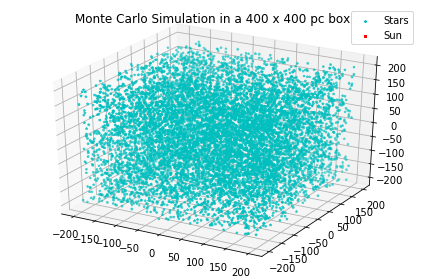

In [5]:
fig = plt.figure()

ax = fig.add_subplot(111, projection="3d")

ax.scatter(
    coordinates[:, 0],
    coordinates[:, 1],
    coordinates[:, 2],
    s=g,
    c="c",
    marker="*",
    label="Stars",
)
ax.scatter(0, 0, 0, s=4.64, c="r", marker="s", label="Sun") # Mv = 4.64
ax.legend()
ax.set_title("Monte Carlo Simulation in a 400 x 400 pc box")

plt.tight_layout()
plt.show()


In [6]:
N = 10000
a = 400

In [7]:
np.random.seed(141)

In [8]:
coordinates = (np.random.random((N, 3)) - 0.5) * a
g = np.random.normal(4.64, 0.6, N) # Mv = 4.64 sigma = 0.6

## 5b.
Prove that the distribution is uniform by computing the
number density of stars in Sun-centred spherical shells and plotting density vs
distance to the Sun in a log-log plot. (Use ~10-20 shells, spaced logarithmically,
extending out to 400 pc). What happens at radii>200 pc? Discuss.

Beyond 200pc, the density begins to plateau, reaching what appears to be an asymptote at 10^4 stars: this implies that beyond a certain point, the sky appears isotropic (i.e. there appears to be roughly an equal amount of stars in any given direction beyond a point of 200pc). 

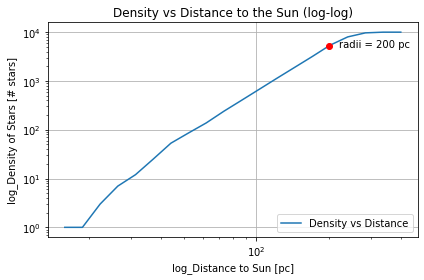

In [209]:
fig = plt.figure()

x = np.logspace(1.2, np.log10(400), 20, base=10)
y = np.logspace(0, np.log10(10000), 20, base=10)

mask = np.sqrt(np.sum(coordinates ** 2, axis=1))
y = [coordinates[mask < x].shape[0] for x in x]

ax = fig.add_subplot(111)
ax.plot(x, y)
ax.set_yscale("log")
ax.set_xscale("log")
xlabel("log_Distance to Sun [pc]")
ylabel("log_Density of Stars [# stars]")
ax.grid(1)
title("Density vs Distance to the Sun (log-log)")
legend(['Density vs Distance'], loc=4)
plt.plot([0, 200], [5300, 5300], "ro")
annotate('radii = 200 pc',xy=(200,5300),xytext=(220,4900),fontsize=10)
plt.tight_layout()
plt.show()


## 5c.
Graph the
probability distribution (i.e., a “histogram”) of absolute magnitudes of all stars in the
box. Draw a Gaussian function with mean 4.64 and dispersion 0.6, normalized to the
same area as that of the star distribution. Compare with the mean and dispersion of
the stars and discuss as appropriate.

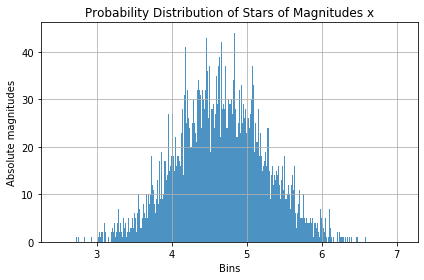

In [139]:
plt.subplot()
b = 1000
mask = np.sqrt(np.sum(coordinates ** 2, axis=1))
hist(g,bins=b,alpha=0.8,histtype="bar")
xlabel('Bins')
ylabel('Absolute magnitudes')
title('Probability Distribution of Stars of Magnitudes x')
density=True
grid(1)

plt.tight_layout()
plt.show()

In [140]:
def Gauss(x, mu=0, sigma=1):
    left = 1 / (np.sqrt(2 * np.pi) * np.sqrt(sigma))
    right = np.exp(-(x - mu)**2 / (2 * sigma))
    return left * right

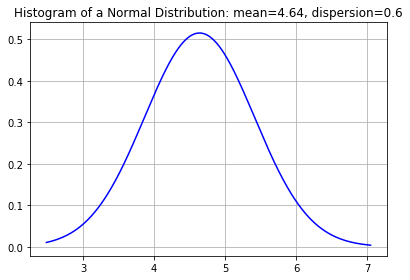

In [146]:
y1 = Gauss(bins, 4.64, 0.6)
plt.plot(bins, y1, 'b-')
grid(1)
title('Histogram of a Normal Distribution: mean=4.64, dispersion=0.6')
plt.tight_layout()
plt.show()

## 5d.
Repeat (c) but only for all stars in your
observational sample, as well as for observed stars in each shell fully contained
inside 200 pc. (Normalize all curves to the same area, for ease of comparison.) Are
the distributions the same as those of the parent distribution? Does the difference
depend on the radius of the shell? Discuss.

------------------
As seen in the histograms plotted below for various sample sizes, smaller sample sizes lie below the parent distribution. With a greater sample, the fits begin to resemble the parent distribution. The difference of the shell radius does impact the fit, as observed above, beyond a certain radius, the distribution begins to resemble an isotropic distribution of stasr. 

In [147]:
N = 10000
a = 400

np.random.seed(12)

coordinates = (np.random.random((N, 3)) - 0.5) * a
g = np.random.normal(4.64, 0.6, N)

log_x = np.logspace(1.2, np.log10(400), 20, base=10)[:15]
mask = np.sqrt(np.sum(coordinates ** 2, axis=1))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


<Figure size 432x288 with 0 Axes>

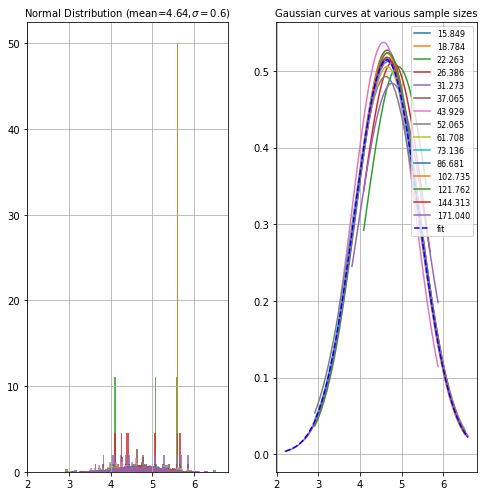

In [231]:
fig = plt.figure()
plt.figure(figsize=(7,7))
ax_1 = plt.subplot(121)
grid(1)
ax_2 = plt.subplot(122)
grid(1)
for x in log_x:
    data = g[mask < x]
    n, bins, patches = ax_1.hist(data, histtype="bar", bins=50, alpha=0.8, density=True)
    y = gd(bins, np.mean(data), np.std(data))
    ax_2.plot(bins, y, label=f'{x:.3f}')
    
y = Gauss(bins, 4.64, 0.6)
ax_2.plot(bins, y, 'b--', label='fit')
legend(loc=1, fontsize=8)

ax_1.set_title('Normal Distribution (mean=4.64,$\sigma=0.6$)',fontsize=10)

ax_2.set_title('Gaussian curves at various sample sizes', fontsize=10)


plt.tight_layout()
plt.show()


## 5e.

What would happen if you were to
repeat the exercise but assuming that the variance of the parent distribution is zero
(i.e., $\sigma=0$V=0 mag)? Discuss.

At $\sigma=0$, the best fit curve (dashed blue) is not present. For reference, another plot is shown below for a $\sigma=0.001$ value


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


<Figure size 432x288 with 0 Axes>

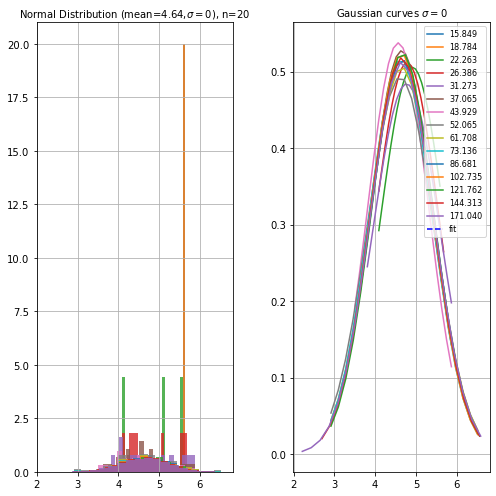

In [242]:
fig = plt.figure()
plt.figure(figsize=(7,7))
ax_1 = plt.subplot(121)
grid(1)
ax_2 = plt.subplot(122)
grid(1)

for x in log_x:
    data = g[mask < x]
    n, bins, patches = ax_1.hist(data, histtype="bar", bins=20, alpha=0.8, density=True)
    y = gd(bins, np.mean(data), np.std(data))
    ax_2.plot(bins, y, label=f'{x:.3f}')
    
y = Gauss(bins, 4.64, 0)
ax_2.plot(bins, y, 'b--', label='fit')
legend(loc=1, fontsize=8)


ax_1.set_title('Normal Distribution (mean=4.64,$\sigma=0$), n=20',fontsize=10)

ax_2.set_title('Gaussian curves $\sigma=0$', fontsize=10)


plt.tight_layout()
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


<Figure size 432x288 with 0 Axes>

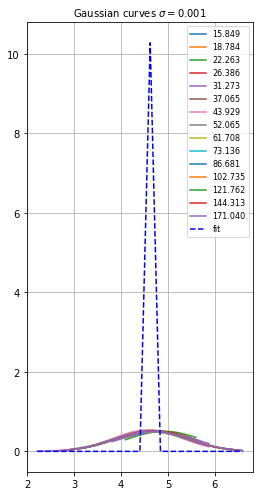

In [240]:
fig = plt.figure()
plt.figure(figsize=(7,7))
ax_2 = plt.subplot(122)
grid(1)

for x in log_x:
    data = g[mask < x]
    n, bins, patches = ax_1.hist(data, histtype="bar", bins=20, alpha=0.8, density=True)
    y = gd(bins, np.mean(data), np.std(data))
    ax_2.plot(bins, y, label=f'{x:.3f}')
    y = Gauss(bins, 4.64, 0.001)
ax_2.plot(bins, y, 'b--', label='fit')
legend(loc=1, fontsize=8)
ax_2.set_title('Gaussian curves $\sigma=0.001$', fontsize=10)
plt.tight_layout()
plt.show()